In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data-ori.csv")

In [3]:
data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


# Task
- Our target is "SOURCE" to find out either "out" or "in
- Features are rest of the columns
- Need to handle SEX column that is a categorical one

# Basic EDA

In [4]:
# More information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


## Seems like no missing value

In [5]:
#check class distribution
data['SOURCE'].value_counts()

out    2628
in     1784
Name: SOURCE, dtype: int64

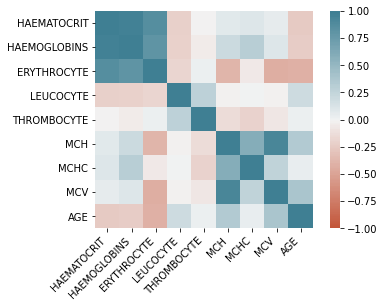

In [6]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Looks like a preety much clear data so no need to do much preprocessing.


Jump to the data preparation and model.

We can use:
- PyCaret
- Sklearn's Pipeline


## Let's first do with PyCaret

In [7]:
!pip3 install -U scikit-learn

     |████████████████████████████████| 22.3MB 43.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [8]:
!pip install pycaret

     |████████████████████████████████| 266kB 7.3MB/s 
     |████████████████████████████████| 2.0MB 11.8MB/s 
     |████████████████████████████████| 6.8MB 19.3MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 245kB 52.9MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 276kB 54.7MB/s 
     |████████████████████████████████| 215kB 50.0MB/s 
     |████████████████████████████████| 14.2MB 343kB/s 
     |████████████████████████████████| 1.7MB 56.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2MB 41.9MB/s 
     |████████████████████████████████| 1.1MB 41.7MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
     |████████████████████████████████| 3.2MB 46.7MB

In [9]:
import pycaret.classification as pc

## Several functions we are going to use:
- setup()
- compare_models()
- create_model()
- tune_model()
- evaluate_model()
- predict_model()

In [10]:
pc.setup(
    data = data,
    target = 'SOURCE',
    train_size = 0.8,
    normalize = True
)

,Description,Value
0,session_id,1939
1,Target,SOURCE
2,Target Type,Binary
3,Label Encoded,"in: 0, out: 1"
4,Original Data,"(4412, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


(Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 False,
 {'ada': <pycaret.containers.models.classification.AdaBoostClassifierContainer at 0x7fc0ed1e1290>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x7fc0ed29a7d0>,
  'et': <pycaret.containers.models.classification.ExtraTreesClassifierContainer at 0x7fc0ed18de50>,
  'gbc': <pycaret.containers.models.classification.GradientBoostingClassifierContainer at 0x7fc0ed18da50>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x7fc0ed1c4890>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x7fc0ed26fd50>,
  'lda': <pycaret.containers.models.classification.LinearDiscriminantAnalysisContainer at 0x7fc0ed1c4b90>,
  'lightgbm': <pycaret.containers.models.classification.LGBMClassifierContainer at 0x7fc0ed198250>,
  'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0

In [11]:
pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7504,0.7940,0.8412,0.7606,0.7988,0.4722,0.4766,0.862
lightgbm,Light Gradient Boosting Machine,0.7438,0.7933,0.8393,0.7539,0.7942,0.4576,0.4626,0.171
gbc,Gradient Boosting Classifier,0.7421,0.7919,0.8542,0.7456,0.7958,0.4501,0.4589,0.482
et,Extra Trees Classifier,0.7419,0.7918,0.8335,0.7546,0.7918,0.4543,0.4588,0.653
ada,Ada Boost Classifier,0.7339,0.7765,0.8445,0.7403,0.7887,0.4334,0.4415,0.193
knn,K Neighbors Classifier,0.7254,0.7598,0.8061,0.7478,0.7756,0.4231,0.4255,0.124
lr,Logistic Regression,0.7181,0.7509,0.8585,0.7182,0.7818,0.3919,0.4056,0.297
lda,Linear Discriminant Analysis,0.7118,0.7505,0.8657,0.7093,0.7795,0.3750,0.3918,0.022
ridge,Ridge Classifier,0.7104,0.0000,0.8676,0.7073,0.7790,0.3710,0.3888,0.019
svm,SVM - Linear Kernel,0.6900,0.0000,0.8503,0.6949,0.7638,0.3255,0.3416,0.028


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1939, verbose=0,
                       warm_start=False)

In [12]:
best_model = pc.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7564,0.7841,0.8413,0.7675,0.8028,0.4860,0.4895
1,0.7592,0.7930,0.8365,0.7733,0.8037,0.4936,0.4961
2,0.7535,0.7929,0.8365,0.7665,0.8000,0.4806,0.4837
3,0.7309,0.7608,0.8462,0.7364,0.7875,0.4254,0.4331
4,0.7479,0.7908,0.8317,0.7621,0.7954,0.4686,0.4717
5,0.7507,0.7771,0.8269,0.7679,0.7963,0.4763,0.4784
6,0.7564,0.8376,0.8413,0.7675,0.8028,0.4860,0.4895
7,0.7422,0.7811,0.8606,0.7427,0.7973,0.4484,0.4577
8,0.7280,0.7895,0.8309,0.7382,0.7818,0.4242,0.4295
9,0.7784,0.8326,0.8599,0.7841,0.8203,0.5330,0.5368


In [13]:
pc.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
tuned_rf_model = pc.tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7422,0.8065,0.8365,0.7532,0.7927,0.4543,0.4587
1,0.7535,0.7891,0.8221,0.7738,0.7972,0.4839,0.4853
2,0.7280,0.7890,0.7885,0.7593,0.7736,0.4335,0.4339
3,0.7422,0.7763,0.8413,0.7511,0.7937,0.4532,0.4584
4,0.7677,0.8012,0.8510,0.7763,0.8119,0.5099,0.5136
5,0.7224,0.7719,0.7788,0.7570,0.7678,0.4229,0.4231
6,0.7564,0.8266,0.8221,0.7773,0.7991,0.4903,0.4916
7,0.7309,0.7875,0.8317,0.7425,0.7846,0.4291,0.4341
8,0.7110,0.7802,0.7874,0.7376,0.7617,0.3958,0.3971
9,0.7699,0.8419,0.8357,0.7864,0.8103,0.5186,0.5201


In [15]:
print(best_model)
print('-----------------------------------')
print(tuned_rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1939, verbose=0,
                       warm_start=False)
-----------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,

In [16]:
pc.evaluate_model(tuned_rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [37]:
unseen_data = data.iloc[[1, 2, 3, 4]]
print(unseen_data)

   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  ...   MCV  AGE  SEX  SOURCE
1         43.5          14.8         5.39       12.7  ...  80.7    1    F     out
2         33.5          11.3         4.74       13.2  ...  70.7    1    F     out
3         39.1          13.7         4.98       10.5  ...  78.5    1    F     out
4         30.9           9.9         4.23       22.1  ...  73.0    1    M     out

[4 rows x 11 columns]


In [38]:
unseen_data['SEX'].replace({'M':1, 'F':0},inplace=True)
print(unseen_data)

   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  ...   MCV  AGE  SEX  SOURCE
1         43.5          14.8         5.39       12.7  ...  80.7    1    0     out
2         33.5          11.3         4.74       13.2  ...  70.7    1    0     out
3         39.1          13.7         4.98       10.5  ...  78.5    1    0     out
4         30.9           9.9         4.23       22.1  ...  73.0    1    1     out

[4 rows x 11 columns]


In [40]:
pc.predict_model(tuned_rf_model, data=unseen_data)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,Label,Score
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,out,out,0.8352
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,out,out,0.7618
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,out,out,0.8322
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,out,out,0.6200


## Sklearn's Pipeline

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, plot_confusion_matrix, matthews_corrcoef

In [56]:
def data_preparation(df):
  df = df.copy()
  #Handle categorical column
  df['SEX'].replace({'M':1, 'F':0},inplace=True)
  #X and y
  X = df.drop("SOURCE", axis=1)
  y = df['SOURCE']
  #split data
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, shuffle=True, random_state=1)
  return X_train, X_test, y_train, y_test

In [57]:
X_train, X_test, y_train, y_test = data_preparation(data)

In [58]:
X_train

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
3512,36.2,12.0,4.09,4.1,139,29.3,33.1,88.5,67,1
2388,47.8,15.9,5.80,11.7,446,27.4,33.3,82.4,51,0
1720,31.2,10.6,3.51,4.5,284,30.2,34.0,88.9,39,0
1466,37.3,12.2,4.54,10.9,353,26.9,32.7,82.2,35,1
1546,34.2,11.6,4.02,8.2,219,28.9,33.9,85.1,36,0
...,...,...,...,...,...,...,...,...,...,...
2895,38.5,12.9,4.37,4.7,319,29.5,33.5,88.1,59,0
2763,38.3,12.2,4.14,5.1,279,29.5,31.9,92.5,57,0
905,46.2,15.8,5.15,6.2,362,30.7,34.2,89.7,26,1
3980,35.1,11.6,4.12,5.1,210,28.2,33.0,85.2,75,1


In [59]:
y_train

3512     in
2388    out
1720    out
1466     in
1546    out
       ... 
2895    out
2763    out
905     out
3980    out
235     out
Name: SOURCE, Length: 3309, dtype: object

In [60]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

3309
1103
3309
1103


## Build the pipeline

In [98]:
model = Pipeline(steps=[
                        ("scaler", StandardScaler()),
                        ("classifier", KNeighborsClassifier(n_neighbors=7))
])

In [99]:
knn_clf = model.fit(X_train, y_train)

In [100]:
y_pred = model.predict(X_test)

In [101]:
y_pred

array(['in', 'in', 'out', ..., 'out', 'out', 'out'], dtype=object)

In [102]:
print("Model score: ", np.round(knn_clf.score(X_test, y_test)*100), "%")

Model score:  72.0 %


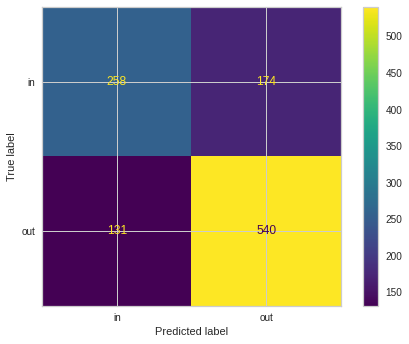

In [103]:
plot_confusion_matrix(knn_clf, X_test, y_test, labels=knn_clf.classes_)

In [107]:
clf_report = classification_report(y_test, y_pred, labels=knn_clf.classes_)
print(clf_report)

              precision    recall  f1-score   support

          in       0.66      0.60      0.63       432
         out       0.76      0.80      0.78       671

    accuracy                           0.72      1103
   macro avg       0.71      0.70      0.70      1103
weighted avg       0.72      0.72      0.72      1103



In [111]:
matthews_corrcoef(y_test, y_pred)

0.41067266697076854